# Hackathon Notebook

## Image Classification

### Import libraries

In [50]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import cv2

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
import seaborn as sns
from collections import Counter

In [51]:
data_dir = 'data'

### Get the categories of drugs 

In [52]:
categories = os.listdir(data_dir)

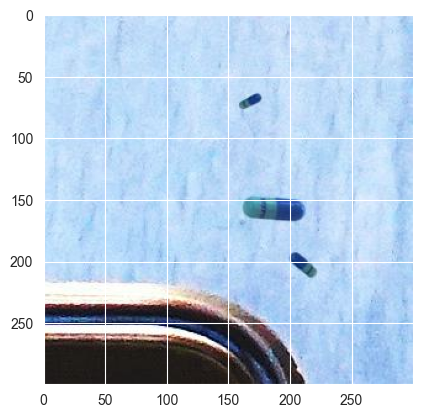

In [53]:
# Test that the image can be loaded using OpenCV

for category in categories: 
    path = os.path.join(data_dir,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show() 
        break
    break

### Set image size for all images

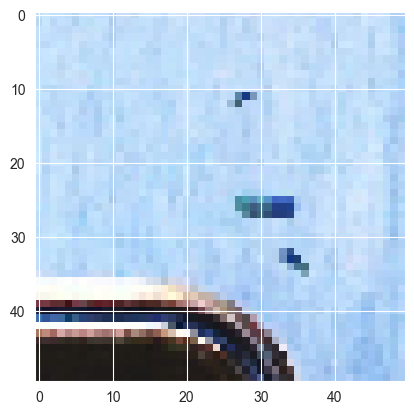

In [54]:
IMG_SIZE = 50 # @ param

# resize all images to the same size
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [55]:
# Initialise empty array for tranining dataset
training_data = []
from tqdm import tqdm

def create_training_data():
    for category in categories: 
        path = os.path.join(data_dir,category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])# write the modified images to the training data
            except Exception as e: 
                pass

In [56]:
create_training_data()

100%|██████████| 1000/1000 [00:01<00:00, 581.20it/s]


### Create dictionary to store labels and visualise the breakdown of data

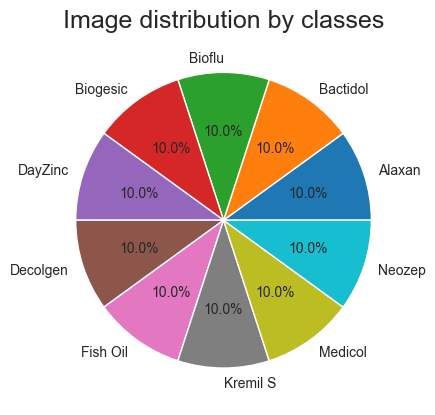

In [57]:
categories_dict = {}
# label the categories of drugs 
for i in range(10):
    categories_dict[i] = categories[i]
    
# Convert to numpy array for usage
values = np.array(training_data, dtype=object)[:, 1]
counter = Counter(values)
data = pd.DataFrame(data={'Values': counter.values(), 'Category' : categories_dict.values()})

# Plot pie chart to visualise the breakdown of the dataset
sns.set_style("darkgrid")
plt.pie(data['Values'], labels=data['Category'], autopct='%1.1f%%')
plt.title('Image distribution by classes', size=18)
plt.show()

### Create the training variables

In [58]:
X = []
y = []

# Cleaning the data into X, y for traning
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)


### Split the dataset for training and testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalise and label

In [60]:
# Normalise the X RGB image data
X_train = X_train / 255
X_test = X_test / 255

# Change the data to a categorical format from label
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### Construct the CNN Model

In [61]:
# Build CNN Model
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2), # add dropout to prevent overfitting
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2), # add dropout to prevent overfitting
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2), # add dropout to prevent overfitting
    Dense(10,  activation='softmax')
])

C:\Users\mpjal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,138 (1.66 MB)

 Trainable params: 435,946 (1.66 MB)

 Non-trainable params: 192 (768.00 B)

In [63]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [64]:
epochs = 15
hist = model.fit(X_train, y_train_cat, batch_size=32, epochs=epochs, validation_split=0.2)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 157ms/step - accuracy: 0.1103 - loss: 2.3882 - val_accuracy: 0.0994 - val_loss: 2.3097
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.1259 - loss: 2.2657 - val_accuracy: 0.1050 - val_loss: 2.3528
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.2510 - loss: 1.9190 - val_accuracy: 0.3219 - val_loss: 1.7108
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.3256 - loss: 1.6807 - val_accuracy: 0.3812 - val_loss: 1.5470
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - accuracy: 0.5169 - loss: 1.2597 - val_accuracy: 0.5019 - val_loss: 1.2379
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 176ms/step - accuracy: 0.6247 - loss: 0.9667 - val_accuracy: 0.6869 - val_loss: 0.9173
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.7429 - loss: 0.7097 - val_accuracy: 0.6975 - val_loss: 0.7396
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.7968 - loss: 0

### Plot the accuracies to visualise the efficacy of the model

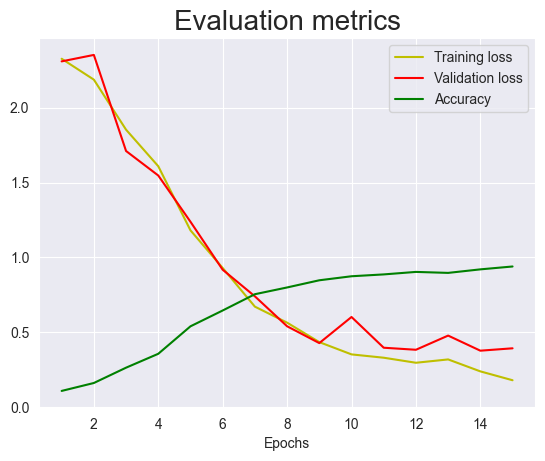

In [65]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(epochs, accuracy, 'g', label='Accuracy')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [66]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


### Measure the accuracy of the model

In [67]:
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))

Accuracy =  0.9075


### Confusion Matrix to evaluate the performace of our model

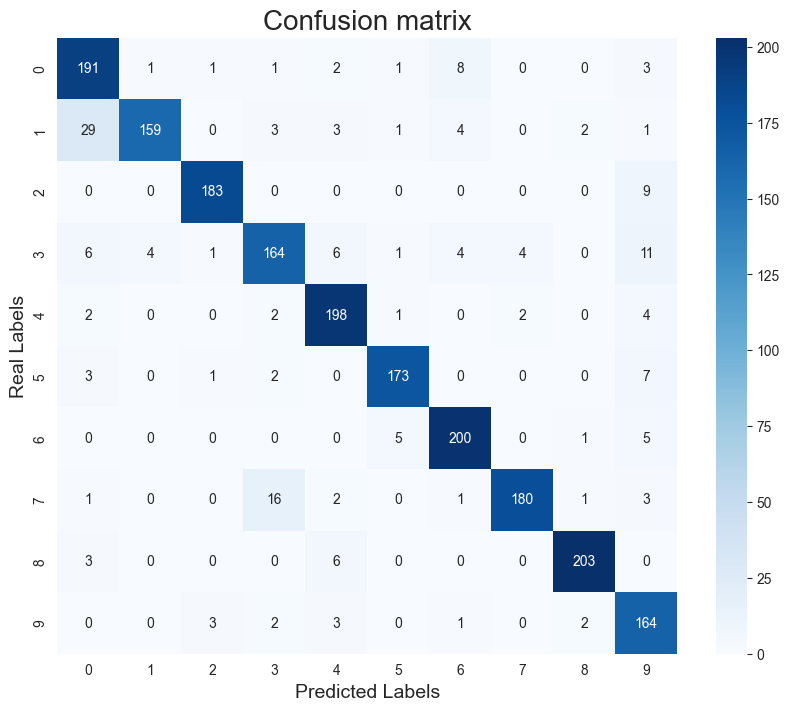

In [68]:
# Visualise how our model performed
cm = confusion_matrix(y_test, predictions)

ax = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Real Labels', size=14)
plt.show()

### See the predictions for some validation images

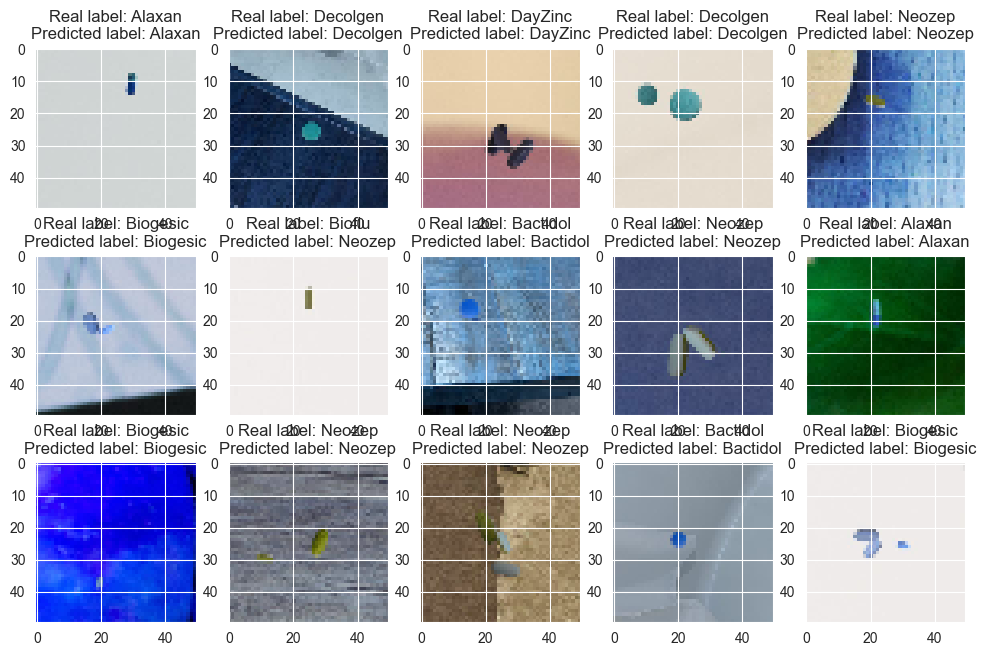

In [69]:
# Check the accuracy of the model for some images

plt.figure(figsize=(12,13))
for i in range(15):
    j = random.randint(0, X_test.shape[0] - 1)
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[j])
    plt.title('Real label: ' + categories_dict[y_test[j]] + '\n' + 'Predicted label: ' + categories_dict[predictions[j]])

### Save the model

In [76]:
model.save('model.keras')

### Define a function to test new images from the Internet

In [73]:
import cv2
import numpy as np

def predict_single_image(image_path, model, categories_dict):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is None:
        print("Failed to load image:", image_path)
        return

    # Preprocess the image (resize, normalize, etc.)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0

    # Make prediction for the preprocessed image
    prediction = model.predict(np.expand_dims(img, axis=0))
    class_index = np.argmax(prediction)
    class_label = categories_dict[class_index]
    confidence = prediction[0][class_index]
    
    if confidence < 0.5:
        print("Sorry, we are unable to detect this image")
    
    else:# Display the image and predicted label
        plt.imshow(img)
        plt.title(f'Predicted label: {class_label}\nConfidence: {confidence:.2f}')
        plt.axis('off')
        plt.show()
        
    return class_label, class_index


### Check if the prediction is accurate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


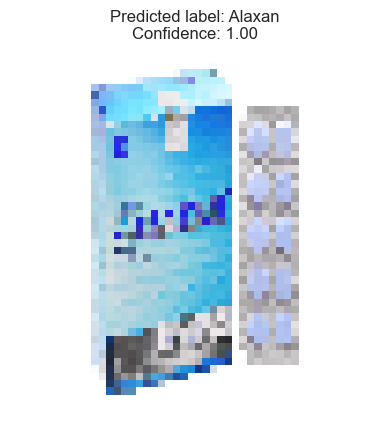

In [74]:
image_path = 'test/alaxan.jpg'
class_label, class_index  = predict_single_image(image_path, model, categories_dict)